## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [3]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
from keras.layers import BatchNormalization
"""Code Here
    建立你的神經網路
    """
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [28]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [29]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
results = {}
from keras.callbacks import EarlyStopping
for Patiences in [5,10,25]:
    earlystop = EarlyStopping(monitor="Validation Accuracy", 
                              patience=Patiences, 
                              verbose=1
                              )
    # dropout
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=256, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "earlystop-%d" % (Patiences)
    results[exp_name_tag] = {'train-loss': train_loss,
                                    'valid-loss': valid_loss,
                                    'train-acc': train_acc,
                                    'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_40 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_41 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_42 (Batc (None, 128)               512       
__________

50000/50000 [==============================] - 7s 143us/step - loss: 0.1744 - acc: 0.9544 - val_loss: 2.6283 - val_acc: 0.4567
Epoch 50/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.1740 - acc: 0.9515 - val_loss: 2.4583 - val_acc: 0.4709
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_43 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_44 (Batc (None, 256)               1024      
________

50000/50000 [==============================] - 7s 144us/step - loss: 0.1987 - acc: 0.9435 - val_loss: 2.4667 - val_acc: 0.4555
Epoch 48/50
50000/50000 [==============================] - 8s 156us/step - loss: 0.1869 - acc: 0.9495 - val_loss: 2.4776 - val_acc: 0.4661
Epoch 49/50
50000/50000 [==============================] - 9s 171us/step - loss: 0.1753 - acc: 0.9522 - val_loss: 2.4008 - val_acc: 0.4805
Epoch 50/50
50000/50000 [==============================] - 8s 152us/step - loss: 0.1628 - acc: 0.9576 - val_loss: 2.4553 - val_acc: 0.4771
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_46 (Batc (None, 512)               2048 

50000/50000 [==============================] - 8s 154us/step - loss: 0.2229 - acc: 0.9351 - val_loss: 2.2762 - val_acc: 0.4797
Epoch 46/50
50000/50000 [==============================] - 7s 145us/step - loss: 0.2059 - acc: 0.9422 - val_loss: 2.3044 - val_acc: 0.4707
Epoch 47/50
50000/50000 [==============================] - 7s 141us/step - loss: 0.2002 - acc: 0.9430 - val_loss: 2.4097 - val_acc: 0.4648
Epoch 48/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.1839 - acc: 0.9500 - val_loss: 2.4795 - val_acc: 0.4684
Epoch 49/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.1798 - acc: 0.9504 - val_loss: 2.4109 - val_acc: 0.4631
Epoch 50/50
50000/50000 [==============================] - 8s 155us/step - loss: 0.1736 - acc: 0.9516 - val_loss: 2.4348 - val_acc: 0.4703


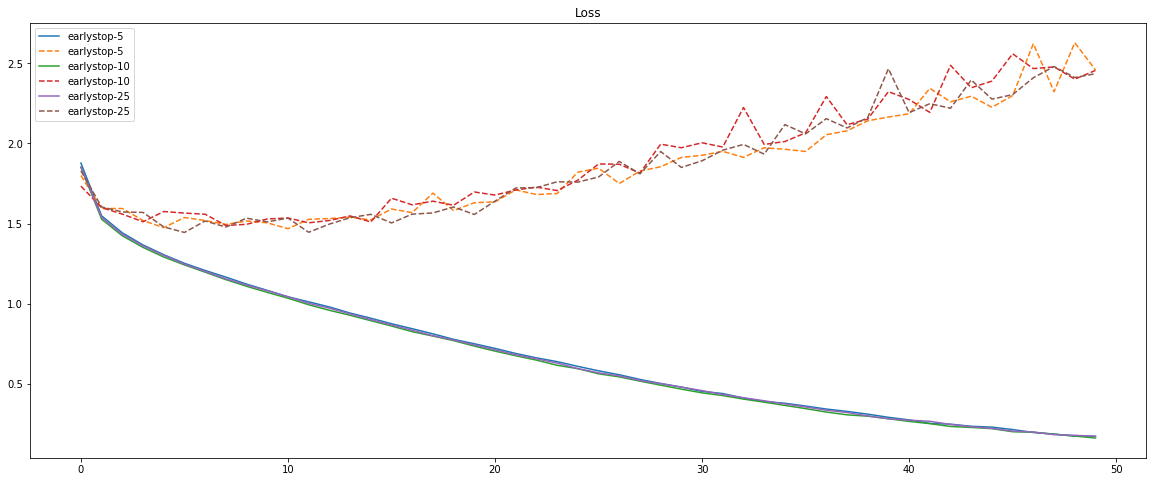

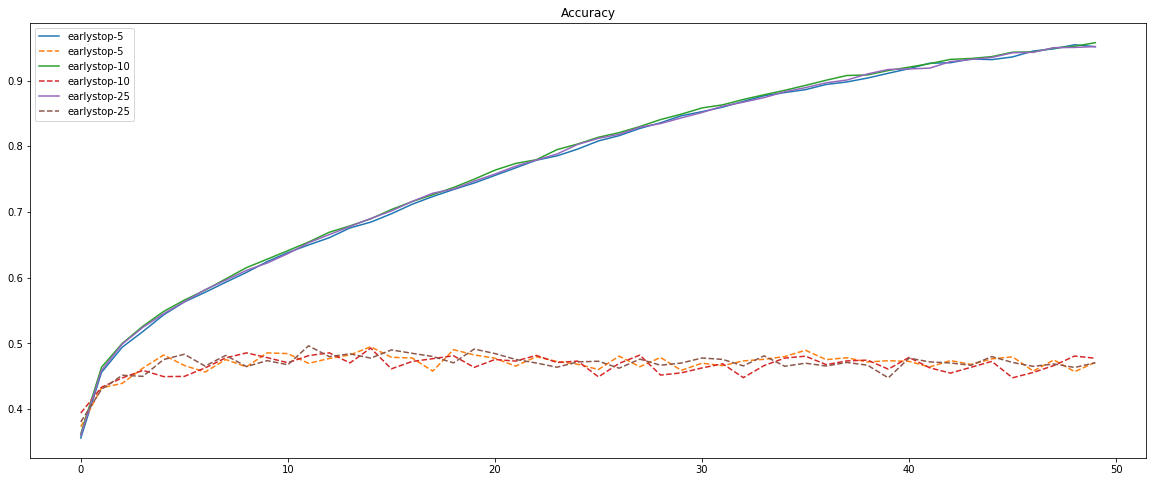

In [30]:
"""Code Here
將結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(20,8))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()